In [30]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
import os
import requests
from datetime import datetime
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import panel as pn
from dotenv import load_dotenv
import json
import quandl

In [2]:
#creating bitcoin data frame
bitcoin_price = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days='max', interval='daily')
btc_price= bitcoin_price['prices']
df_btc = pd.DataFrame(btc_price)
df_btc.columns=['Date', 'Price']
df_btc['Date'] = pd.to_datetime(df_btc['Date'],unit='ms')
df_btc.set_index('Date', inplace=True)
df_btc.index = df_btc.index.normalize()
df_btc

,Price
Date,
2013-04-28,135.300000
2013-04-29,141.960000
2013-04-30,135.300000
2013-05-01,117.000000
2013-05-02,103.430000
...,...
2021-04-14,63576.676041
2021-04-15,62807.123233
2021-04-16,63179.772446


In [3]:
btc_daily_returns=df_btc.pct_change()
btc_daily_returns.columns = ['BTC Price Change']
btc_daily_returns

,BTC Price Change
Date,
2013-04-28,NaN
2013-04-29,0.049224
2013-04-30,-0.046915
2013-05-01,-0.135255
2013-05-02,-0.115983
...,...
2021-04-14,0.061185
2021-04-15,-0.012104
2021-04-16,0.005933


<AxesSubplot:xlabel='Date'>

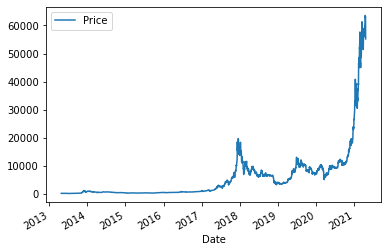

In [4]:
df_btc.plot()

In [5]:
gold = pd.read_csv('Gold_Futures_Data.csv')
gold.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace = True)
gold['Date'] = pd.to_datetime(gold['Date'])
gold.set_index('Date', inplace=True)
gold.sort_values(by='Date', ascending=True, inplace=True)
gold

,Price
Date,
2013-04-29,1467.4
2013-04-30,1472.2
2013-05-01,1446.3
2013-05-02,1467.7
2013-05-03,1464.3
...,...
2021-04-09,1743.3
2021-04-12,1731.2
2021-04-13,1746.2


In [6]:
gold_daily_returns=gold.pct_change()
gold_daily_returns.columns = ['Gold Price Change']
gold_daily_returns

,Gold Price Change
Date,
2013-04-29,NaN
2013-04-30,0.003271
2013-05-01,-0.017593
2013-05-02,0.014796
2013-05-03,-0.002317
...,...
2021-04-09,-0.007684
2021-04-12,-0.006941
2021-04-13,0.008665


In [7]:
#gold.plot()

In [8]:
combined_data = pd.concat([gold_daily_returns, btc_daily_returns], axis = "columns", join="inner")
combined_df= combined_data.dropna()
combined_df

,Gold Price Change,BTC Price Change
Date,,
2013-04-30,0.003271,-0.046915
2013-05-01,-0.017593,-0.135255
2013-05-02,0.014796,-0.115983
2013-05-03,-0.002317,-0.120081
2013-05-06,0.002595,0.013186
...,...,...
2021-04-09,-0.007684,0.034404
2021-04-12,-0.006941,0.000144
2021-04-13,0.008665,-0.001284


<AxesSubplot:xlabel='Date'>

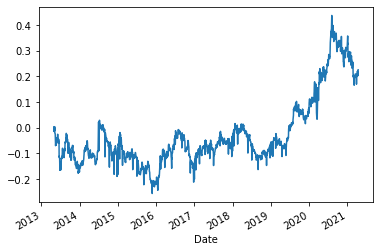

In [9]:
cumulative_daily_returns = (1+ combined_df).cumprod()-1
cumulative_daily_returns['Gold Price Change'].plot()

<AxesSubplot:xlabel='Date'>

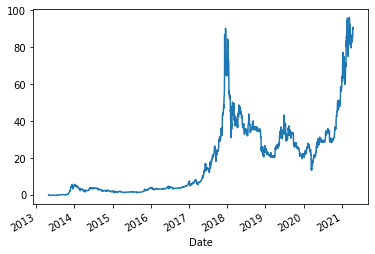

In [10]:
cumulative_daily_returns['BTC Price Change'].plot()

In [39]:
cpi_data = quandl.get("RATEINF/CPI_USA", start_date="2007-01-01", end_date="2021-04-01")
cpi_data

,Value
Date,
2007-01-31,202.416
2007-02-28,203.499
2007-03-31,205.352
2007-04-30,206.686
2007-05-31,207.949
...,...
2020-11-30,260.229
2020-12-31,260.474
2021-01-31,261.582


<AxesSubplot:xlabel='Date'>

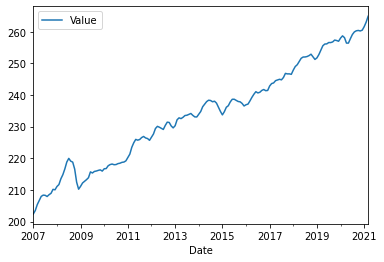

In [40]:
cpi_data.plot()

In [37]:
gdp_data = quandl.get("FRED/GDP", start_date="2007-01-01", end_date="2021-04-01")
gdp_data

,Value
Date,
2007-01-01,14208.569
2007-04-01,14382.363
2007-07-01,14535.003
2007-10-01,14681.501
2008-01-01,14651.039
2008-04-01,14805.611
2008-07-01,14835.187
2008-10-01,14559.543
2009-01-01,14394.547


<AxesSubplot:xlabel='Date'>

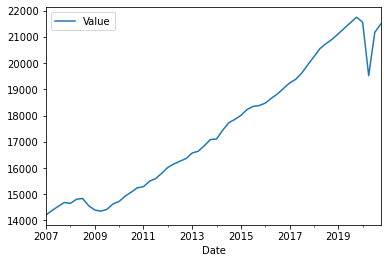

In [38]:
gdp_data.plot()

In [72]:
t_bill_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v2/accounting/od/avg_interest_rates"
t_bill_url = t_bill_url + "?format=json"
requests.get(t_bill_url)
response_data = requests.get(t_bill_url)





response_content = response_data.content
#print(response_content)